In [1]:
import pandas as pd
import numpy as np

In [3]:
df_respuestas = pd.read_csv("respuestas.csv", delimiter=";")

In [4]:
df_respuestas.head()

,Edad,Exp_con_DBs,Rol,R_1,D_1,R_2,D_2,R_3,D_3,R_4,...,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,P_10
0,25 - 34,1,Profesional de los Datos,38,1,10,2,27,2,53413,...,2,2,3,2,2,3,3,3,3,3
1,25 - 34,0,Otros,38,2,10,4,27,3,53413,...,5,2,4,1,5,1,5,1,4,1
2,25 - 34,0,Otros,38,1,10,2,27,1,53413,...,4,1,5,2,5,1,5,1,5,1
3,25 - 34,1,Otros,38,1,"69,93",2,29,1,10637,...,5,2,5,1,5,2,5,1,5,1
4,8 - 24,0,Profesional TI,38,1,"29,38",2,"47,7",1,53413,...,3,1,5,1,5,1,4,1,5,1


In [6]:
df_respuestas.dtypes

Edad           object
Exp_con_DBs     int64
Rol            object
R_1             int64
D_1             int64
R_2            object
D_2             int64
R_3            object
D_3             int64
R_4             int64
D_4             int64
P_1             int64
P_2             int64
P_3             int64
P_4             int64
P_5             int64
P_6             int64
P_7             int64
P_8             int64
P_9             int64
P_10            int64
dtype: object

In [7]:
import pandas as pd

# Asume que ya has cargado tu DataFrame:
# df_respuestas = pd.read_csv('tus_respuestas.csv')  # o como lo hayas importado

# 1) Extrae la primera fila como respuestas correctas
true_row = df_respuestas.iloc[0]
def parse_percent(x):
    """Convierte '14.7%' → 0.147, o str numérico → float."""
    try:
        s = str(x).strip()
        return float(s.rstrip('%'))/100 if '%' in s else float(s)
    except:
        return pd.NA

true_answers = {
    'R_1': true_row['R_1'],
    'R_2': parse_percent(true_row['R_2']),
    'R_3': parse_percent(true_row['R_3']),
    'R_4': true_row['R_4']
}

# 2) Prepara DataFrame de participantes (sin la fila de respuestas correctas)
df = df_respuestas.iloc[1:].reset_index(drop=True).copy()
# Convierte R_2 y R_3 a numérico porcentual
df['R_2_num'] = df['R_2'].apply(parse_percent)
df['R_3_num'] = df['R_3'].apply(parse_percent)

# 3) Marca correctitud de cada tarea
df['correct_1'] = df['R_1'] == true_answers['R_1']
df['correct_2'] = df['R_2_num'] == true_answers['R_2']
df['correct_3'] = df['R_3_num'] == true_answers['R_3']
df['correct_4'] = df['R_4'] == true_answers['R_4']

# 4) Estadísticas demográficas y de perfil
print("### Demografía y perfil")
print("- Distribución por edad (%):")
print((df['Edad'].value_counts(normalize=True)*100).round(1).astype(str) + "%\n")
print("- Experiencia previa con dashboards (%):")
print((df['Exp_con_DBs'].value_counts(normalize=True)*100).round(1).astype(str) + "%\n")
print("- Roles principales (%):")
print((df['Rol'].value_counts(normalize=True)*100).round(1).astype(str) + "%\n")

# 5) Eficacia (accuracy) y dificultad media de cada tarea
for i in range(1, 5):
    acc = df[f'correct_{i}'].mean()
    diff = df[f'D_{i}'].mean()
    print(f"Tarea {i}:")
    print(f"  • Precisión: {acc:.0%}")
    print(f"  • Dificultad media (1–5): {diff:.2f}\n")

# 6) Cálculo de la puntuación SUS
odd = df[['P_1','P_3','P_5','P_7','P_9']].subtract(1)
even = df[['P_2','P_4','P_6','P_8','P_10']].rsub(5)
df['SUS_score'] = (odd.sum(axis=1) + even.sum(axis=1)) * 2.5

print("### SUS")
print(f"Media SUS: {df['SUS_score'].mean():.1f}")
print(f"Desviación estándar SUS: {df['SUS_score'].std():.1f}")

# 7) (Opcional) Guarda un CSV con todos los resultados
df.to_csv('usability_analysis_results.csv', index=False)
print("\nResultados exportados a usability_analysis_results.csv")


### Demografía y perfil
- Distribución por edad (%):
Edad
25 - 34    75.0%\n
8 - 24     25.0%\n
Name: proportion, dtype: object
- Experiencia previa con dashboards (%):
Exp_con_DBs
0    75.0%\n
1    25.0%\n
Name: proportion, dtype: object
- Roles principales (%):
Rol
Otros             75.0%\n
Profesional TI    25.0%\n
Name: proportion, dtype: object
Tarea 1:
  • Precisión: 100%
  • Dificultad media (1–5): 1.25

Tarea 2:
  • Precisión: 50%
  • Dificultad media (1–5): 2.50

Tarea 3:
  • Precisión: 50%
  • Dificultad media (1–5): 1.50

Tarea 4:
  • Precisión: 75%
  • Dificultad media (1–5): 1.25

### SUS
Media SUS: 93.8
Desviación estándar SUS: 1.4

Resultados exportados a usability_analysis_results.csv


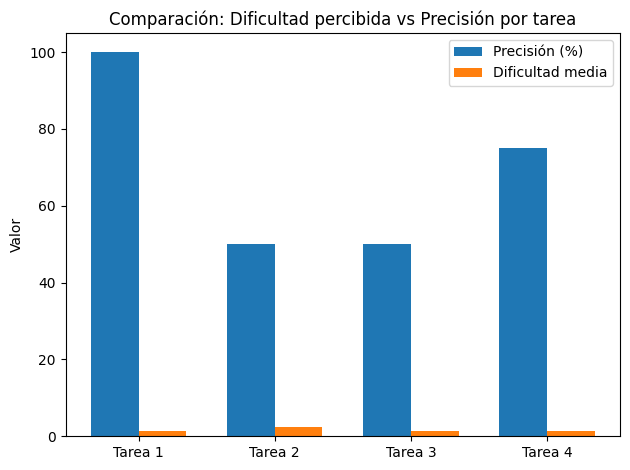

In [10]:
import matplotlib.pyplot as plt

# Asume que df_respuestas ya está definido y que:
# – fila 0: respuestas “verdaderas”
# – de la fila 1 en adelante: participantes

def parse_percent(x):
    """Convierte '14,7%' o '14.7%' → 0.147, o str numérico → float."""
    s = str(x).strip().replace(',', '.')
    try:
        return float(s.rstrip('%'))/100 if '%' in s else float(s)
    except ValueError:
        return pd.NA

# 1) Extrae respuestas correctas de la primera fila
true = df_respuestas.iloc[0]
true_ans = {
    1: true['R_1'],
    2: parse_percent(true['R_2']),
    3: parse_percent(true['R_3']),
    4: true['R_4']
}

# 2) DataFrame de participantes
df = df_respuestas.iloc[1:].copy().reset_index(drop=True)
df['R_2_num'] = df['R_2'].apply(parse_percent)
df['R_3_num'] = df['R_3'].apply(parse_percent)

# 3) Calcula precisión (%) y dificultad media
tasks = [1, 2, 3, 4]
accuracy = []
difficulty = []

for i in tasks:
    if i in [1, 4]:
        correct = df[f'R_{i}'] == true_ans[i]
    else:
        correct = df[f'R_{i}_num'] == true_ans[i]
    accuracy.append(correct.mean() * 100)
    difficulty.append(df[f'D_{i}'].mean())

# 4) Dibuja la gráfica comparativa
x = range(len(tasks))
width = 0.35

fig, ax = plt.subplots()
ax.bar([xi - width/2 for xi in x], accuracy, width, label='Precisión (%)')
ax.bar([xi + width/2 for xi in x], difficulty, width, label='Dificultad media')
ax.set_xticks(x)
ax.set_xticklabels([f'Tarea {i}' for i in tasks])
ax.set_ylabel('Valor')
ax.set_title('Comparación: Dificultad percibida vs Precisión por tarea')
ax.legend()
plt.tight_layout()
# Guarda la figura en disco antes de mostrarla
fig.savefig('dificultad_vs_precision.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
# 2. Limpiar nombres de columnas
df = df_respuestas.copy()
df.columns = df.columns.str.strip()

In [8]:
df.head()

,Marca temporal,Información y consentimiento,Edad,Experiencia previa con dashboards de datos,Rol principal,Respuesta,Dificultad,Respuesta.1,Dificultad.1,Respuesta.2,...,Me ha resultado fácil usar los paneles.,Creo que necesitaría ayuda técnica para usarlos.,Las funcionalidades están bien integradas.,Hay demasiada inconsistencia en los paneles.,Pienso que la mayoría de la gente aprendería a usarlos rápidamente,Los paneles me resultan muy engorrosos de usar.,Me siento seguro/a usando los paneles.,Necesité aprender muchas cosas antes de empezar a utilizarlos.,¿Qué es lo que más te ha gustado de los paneles?,¿Qué mejorarías o te ha resultado confuso?
0,28/06/2025 18:10:44,Acepto participar de forma voluntaria y que mi...,25 - 34 años,Sí,Profesional de los Datos,38,1,10,2,27,...,3,2,2,3,3,3,3,3,Que están bien historiados,Nada


In [5]:
# 3. Distribuciones demográficas
print("=== Demográficos ===\n")
for col in ['Edad', 'Experiencia previa con dashboards de datos', 'Rol principal']:
    print(f"{col!r}:")
    print(df[col].value_counts(dropna=False), "\n")

# 4. Resumen de tareas (T1–T4)
tasks = {
    'T1': {'resp':'Respuesta',     'diff':'Dificultad',     'label':'Mediana de edad (2005)'},
    'T2': {'resp':'Respuesta.1',   'diff':'Dificultad.1',   'label':'% PIB pensiones (2022)'},
    'T3': {'resp':'Respuesta.2',   'diff':'Dificultad.2',   'label':'% <35 con vivienda (2024)'},
    'T4': {'resp':'Respuesta.3',   'diff':'Dificultad.3',   'label':'VPO terminadas (2001)'},
}

=== Demográficos ===

'Edad':


NameError: name 'df' is not defined

In [12]:
# 3. Definir las columnas de respuesta y dificultad para cada tarea
tasks = {
    'T1': {'resp_col':'Respuesta',   'diff_col':'Dificultad',   'label':'Mediana de edad (2005)'},
    'T2': {'resp_col':'Respuesta.1', 'diff_col':'Dificultad.1', 'label':'% PIB pensiones (2022)'},
    'T3': {'resp_col':'Respuesta.2', 'diff_col':'Dificultad.2', 'label':'% <35 con vivienda (2024)'},
    'T4': {'resp_col':'Respuesta.3', 'diff_col':'Dificultad.3', 'label':'VPO terminadas (2001)'},
}

# 4. Extraer la "fila de prueba" (asumimos que es la primera, índice 0)
test_row = df.iloc[0]

# 5. Calcular para cada tarea si cada participante (a partir de fila 1) acertó o no
results = []
for t, cfg in tasks.items():
    # valor correcto de la prueba
    correct_val = pd.to_numeric(test_row[cfg['resp_col']], errors='coerce')
    
    # respuestas de los usuarios (omitimos la fila 0)
    resp = pd.to_numeric(df[cfg['resp_col']].iloc[1:], errors='coerce')
    diff = pd.to_numeric(df[cfg['diff_col']].iloc[1:], errors='coerce')
    
    # acierto exacto
    is_correct = resp == correct_val
    
    # estadísticas útiles
    n = len(resp)
    n_correct = is_correct.sum()
    pct_correct = 100 * n_correct / n if n else np.nan
    avg_diff_correct = diff[is_correct].mean() if n_correct else np.nan
    avg_diff_incorrect = diff[~is_correct].mean() if n_correct < n else np.nan
    
    results.append({
        'Tarea': t,
        'Descripción': cfg['label'],
        'N participantes': n,
        'Aciertos': f"{n_correct} ({pct_correct:.1f}%)",
        'Dif. media (acertaron)': round(avg_diff_correct, 2),
        'Dif. media (fallaron)': round(avg_diff_incorrect, 2)
    })

summary_df = pd.DataFrame(results)

# 6. Mostrar resultados
print("=== Resumen de aciertos y dificultad por tarea ===")
print(summary_df.to_string(index=False))

# 7. (Opcional) Correlación entre dificultad y acierto
print("\n=== Correlaciones dificultad vs. acierto ===")
for t, cfg in tasks.items():
    resp = pd.to_numeric(df[cfg['resp_col']].iloc[1:], errors='coerce')
    diff = pd.to_numeric(df[cfg['diff_col']].iloc[1:], errors='coerce')
    correct = (resp == pd.to_numeric(test_row[cfg['resp_col']], errors='coerce')).astype(int)
    corr = diff.corr(correct)
    print(f"{t}: Corr(dificultad, acierto) = {corr:.2f}")

=== Resumen de aciertos y dificultad por tarea ===
Tarea               Descripción  N participantes Aciertos  Dif. media (acertaron)  Dif. media (fallaron)
   T1    Mediana de edad (2005)                0 0 (nan%)                     NaN                    NaN
   T2    % PIB pensiones (2022)                0 0 (nan%)                     NaN                    NaN
   T3 % <35 con vivienda (2024)                0 0 (nan%)                     NaN                    NaN
   T4     VPO terminadas (2001)                0 0 (nan%)                     NaN                    NaN

=== Correlaciones dificultad vs. acierto ===
T1: Corr(dificultad, acierto) = nan
T2: Corr(dificultad, acierto) = nan
T3: Corr(dificultad, acierto) = nan
T4: Corr(dificultad, acierto) = nan


In [11]:
# 5. Cálculo de SUS
sus_cols = [
    'Me gustaría utilizar estos paneles con frecuencia.',
    'Los paneles son innecesariamente complejos.',
    'Me ha resultado fácil usar los paneles.',
    'Creo que necesitaría ayuda técnica para usarlos.',
    'Las funcionalidades están bien integradas.',
    'Hay demasiada inconsistencia en los paneles.',
    'Pienso que la mayoría de la gente aprendería a usarlos rápidamente',
    'Los paneles me resultan muy engorrosos de usar.',
    'Me siento seguro/a usando los paneles.',
    'Necesité aprender muchas cosas antes de empezar a utilizarlos.'
]
sus_cols = [c.strip() for c in sus_cols]
sus = df[sus_cols].astype(int).copy()

# Recodificar: ítems impares (positivos) → x−1; pares (negativos) → 5−x
for i, col in enumerate(sus_cols, start=1):
    if i % 2 == 1:
        sus[col] = sus[col] - 1
    else:
        sus[col] = 5 - sus[col]

df['SUS'] = sus.sum(axis=1) * 2.5

print("=== Estadísticos SUS ===")
print(df['SUS'].describe(), "\n")

# 6. Guardar resúmenes en CSV
task_df.to_csv('summary_tareas.csv', index=False)
df[['SUS']].to_csv('summary_sus.csv', index=False)

print("📊 Resúmenes guardados en summary_tareas.csv y summary_sus.csv")

=== Estadísticos SUS ===
count     1.0
mean     50.0
std       NaN
min      50.0
25%      50.0
50%      50.0
75%      50.0
max      50.0
Name: SUS, dtype: float64 

📊 Resúmenes guardados en summary_tareas.csv y summary_sus.csv


Los ítems del SUS se responden de 1 a 5, pero el resultado final **no** se queda en esa escala sino que se convierte a **0–100**. Así es como funciona:

1. Cada pregunta responde con un valor 1–5 (1 = Muy en desacuerdo; 5 = Muy de acuerdo).
2. Se recodifican:

   * Ítems positivos (1, 3, 5, 7, 9): se resta 1 → quedan en 0–4.
   * Ítems negativos (2, 4, 6, 8, 10): se resta su valor a 5 → quedan en 0–4.
3. Se suman todos esos valores (máximo 20) y se multiplican por **2.5** → escala 0–100.

Por tanto:

* Un **SUS = 50** equivale a una puntuación media en los ítems de:

  $$
    \frac{50}{2{.}5} \;=\; 20 \quad\Longrightarrow\quad \frac{20}{5\;\text{ítems}} = 4
  $$

  ¡Ojo! Un 20 sobre 20 significa un **2** de media antes de multiplicar (no un 4). El cálculo exacto es:

  * Si todas las preguntas fueran “3 = Neutral”:

    * Ítems positivos: 3 − 1 = 2 (por cada uno, 5 ítems → 5·2 = 10)
    * Ítems negativos: 5 − 3 = 2 (otros 5 ítems → 5·2 = 10)
    * Suma = 20 → 20·2.5 = 50

  Así que **SUS=50** corresponde a un **3 “Neutral”** de media en la escala original 1–5.

---

### Cómo interpretarlo

* **< 50** → peor que “Neutral” (la gente tiende al desacuerdo).
* **≈ 50** → “Neutral” (ni de acuerdo ni en desacuerdo).
* **> 50** → más hacia “De acuerdo”.
* **68** es el punto de corte estándar para decir que la usabilidad es “aceptable”.
* **80+** se considera “excelente”.

Con un **50**, tus testers han valorado los paneles de forma básicamente neutra, señalando que **hay margen de mejora** para llevar la experiencia hacia el “De acuerdo” (valores > 50).
